# Atividade 01 - Parte 01 - Inventário de emissões utilizando Python

Desenvolvedores: 

Sérgio Strack Junior

Sabrina de Melo


Para o seguinte estudo, Utilizamos o capítulo 2.1 da AP42, é uma referência para o nosso empreendimento que emite poluentes a partir do processo de gaseificador. 

Empreendimento: Serrana Engenharia LTDA. Grupo SALUMA.

Resumo do processo: A gaseificação é definida como conversão de biomassa, ou qualquer combustível sólido (material carbonáceo sólido ou líquido), em um gás energético, através da oxidação parcial à elevada temperatura 500°C – 1400°C e pressão variável (atmosférica à 33 bar) (Morrin, Lettieri et al., 2011). Durante a gaseificação, a maior parte do material de alimentação é termicamente decomposto na forma de gás, porém pequenas quantidades de subprodutos são também formadas, incluindo alcatrão, carvão e cinzas.
Existem dois tipos de gaseificação: direta, ocorrendo em um único reator, e indireta, que requer um agente de gaseificação externo, como vapor. A gaseificação é economicamente e ambientalmente viável, especialmente quando utilizada com resíduos sólidos, tornando-a uma opção sustentável.

- Em nosso empreendimento, temos a informação que cada gaseificador trata, por dia, 45,3 toneladas de RSU e 2,5t de água contaminada e chorume. 

Nosso objetivo é estudar sobre os poluentes atmosféricos proferidos pelo o sistema de gaseificação. 

Primeiramente, formamos um código para encontrar nossa tabela de dados em nosso diretório.

In [458]:
# Utilizando Pandas para abrir a planilha
import pandas as pd
import os

# Coletando o caminho da pasta que estou
cwd = os.getcwd()

# Pasta dos fatores de emissão
path = cwd+'\\tabelas\\FE'
print(path)

# Indicando nome do arquivo
chapterNumer = 2
subChapter = 2
file = 'chp_'+str(chapterNumer)+'_'+str(subChapter)+'.csv'
print(file)

# Abrindo arquivo utilizando o Pandas
fe = pd.read_csv(path + '\\'+file)
print(fe)

i:\airpolution\tabelas\FE
chp_2_2.csv
                   Processos       PM       Hg        Ni        Pb   SO2  HCl
0                     Reator  12.6000  0.00280  0.003930  0.107000  1.73  3.2
1  Sistema de Limpeza do gas   0.1050  0.00280  0.000056  0.001500  0.00  0.0
2      Reuperacao de energia   0.0295  0.00198  0.001610  0.001450  0.00  0.0
3             Nao controlado   0.0352  0.00163  0.000135  0.000458  0.00  0.0


Abaixo, foi formado gráficos referentes aos poluentes e consigo os processos causadores de poluição referente ao empreendimento de estudo:

*Considerado uma taxa de 45300 kg de RSU por dia. (45,3 ton * 1000 para deixar em kg)

Processos    ReatorReatorReatorReatorReatorReatorReatorReat...
PM                                                   578467.41
Hg                                                     417.213
Ni                                                    259.6143
Pb                                                   5001.4824
SO2                                                    78369.0
HCl                                                   144960.0
dtype: object
1
2
3
4
5
6


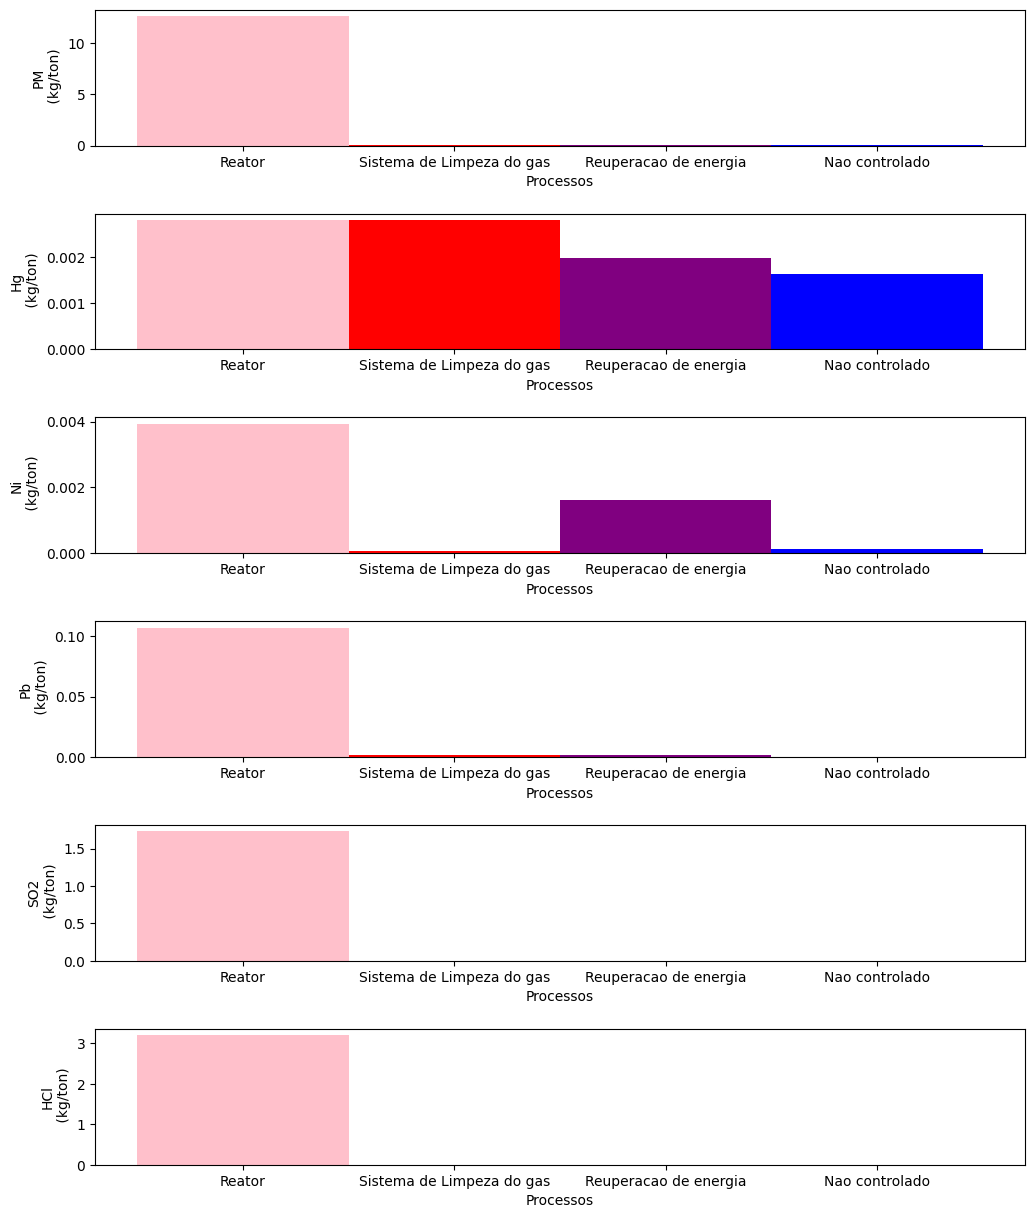

In [459]:
#plotando os fatores de emissão
import matplotlib.pyplot as plt

atv = 45300 # Kg/dia Considerando a taxa de atividade
emis = fe*atv

#somando dataframe
print(emis.sum())
largura_barra = 1

#sharex significa compartilhar o eixo x
fig,ax = plt.subplots(len(fe.columns)-1,1,figsize=(12, 15))

#loop para preencher o subplot com os graficos de barra com os valores da planilha
for ii in range(1,len(fe.columns)):
    print(ii)
    ax[ii-1].bar(fe['Processos'],fe.iloc[:,ii], color=['pink', 'red','purple','blue','yellow'], width=largura_barra)
    ax[ii-1].set_xlabel('Processos', fontsize = 10)
    ax[ii-1].set_ylabel(fe.columns[ii]+'\n (kg/ton)', fontsize = 10)
    plt.subplots_adjust(hspace=0.5)
   
fig.savefig(cwd + '\\imagens\\barplot_fatorEmiss.png')

# Os gráficos mostram no eixo Y as concentrações dos poluentes e no eixo X os processos que estão emitindo esses poluentes.
# CONCENTRAÇÃO X PROCESSOS
# Com a plotagem dos gráficos notamos:
# - Quando não é controlado a concentração de poluentes é alta;
# - O processo do empreendimento que mais ocasiona a geração de poluentes é na parte do REATOR; 
# - Mércurio é o poluente que é mais emitido por esse sistema de combustão de resíduos;


Criando Taxa de Atividade aleatória com sazonalidade


- Nesta sessão criamos uma taxa de atividade para o empreendimento e formamos valores aleatórios em cima da máxima e minímia que o empreendimento produz, em cima da sazonalidade ao longo dos meses do ano;

- Foi elaborado uma função para ler a planilha dos fatores de emissão e estimar a emissão com base na taxa de atividade do empreendimento;

- Esse código retorna as emissões estimadas conforme a taxa de atividade do empreendimento;

In [460]:
import pandas as pd

def estimar_emissao(taxa_atividade, arquivo_planilha):
    # Ler a planilha de fatores de emissão
    df = pd.read_csv(arquivo_planilha)
    
   # Calcular as emissões
    emissao0 = taxa_atividade * df['PM'].sum()
    emissao1 = taxa_atividade * df['Hg'].sum()
    emissao2 = taxa_atividade * df['Ni'].sum()
    emissao3 = taxa_atividade * df['Pb'].sum()
    emissao4 = taxa_atividade * df['SO2'].sum()
    emissao5 = taxa_atividade * df['HCl'].sum()

    # Retornar uma lista de emissões
    return [emissao0, emissao1, emissao2, emissao3, emissao4, emissao5]

taxa_atividade = 45.3  #ton/dia   
arquivo_planilha = r'I:\airpolution\tabelas\FE\chp_2_2.csv'  
emissoes_estimadas = estimar_emissao(taxa_atividade, arquivo_planilha)
print("Emissões estimadas:", emissoes_estimadas)
print(taxa_atividade)
# Os valores gerados está mostrando as emissões estimadas para cada poluente do estudo;


Emissões estimadas: [578.46741, 0.41721299999999995, 0.25961429999999996, 5.0014823999999996, 78.369, 144.96]
45.3


[47.26428565 54.72624308 49.68393742 47.08801076 41.65091775 51.61835097
 42.27578643 62.64601909 65.87027481 39.84735212 58.15886796 46.37093715
 48.12679857 64.16300923 25.83596721 26.55774909 23.55679513 59.99300007
 57.55033028 61.67004485 66.54103265 58.49226161 43.3473494  57.65673356
 27.954608   51.35045781 29.07939494 65.01840093 46.05489723 41.24758801
 34.5153192  57.37438097 43.1083424  48.14426261 23.49272255 50.35095204
 50.10249316 50.31948976 64.97710132 53.22964041 38.77392934 42.25088313
 53.93875914 25.3511124  52.55448719 52.72810845 32.08565786 28.43234445
 36.79696154 38.96242808 48.22332515 42.32127788 66.97856664 27.22670976
 32.01812251 29.88473188 51.9419084  34.01012837 43.56403816 33.6124878
 29.77978583 27.60032508 52.08638209 28.84750537 31.46671892 39.1873239
 59.47154636 27.00499222 60.2318291  26.96001359 66.44420701 43.66900639
 66.45773481 49.77732156 55.80597154 24.40757248 35.33389227 28.04081577
 35.93188786 27.9749382  36.9115456  41.2296953  25.5

Text(0, 0.5, 'Valores das concentrações')

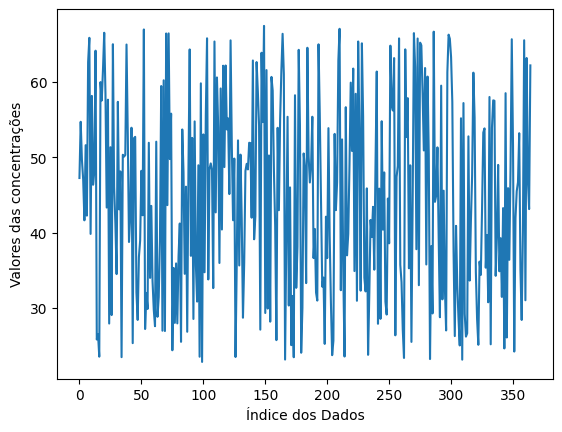

In [461]:
# Utilizando o método de monte carlo.
# Criando vetor com os valores de máxima e miníma de atividade;
import numpy as np
atvMax = 67.5 #ton/dia
atvMin = 22.65 #ton/dia
n = 365
atv = (atvMax - atvMin)*np.random.rand(n) + atvMin #valores que representam a concentração dos poluentes;

print(atv)

# Criando uma figura com os valores
fig, ax= plt.subplots()
ax.plot(atv)
ax.set_xlabel('Índice dos Dados')
ax.set_ylabel('Valores das concentrações')

# Os valores da matriz se dá pela a atividade em função dos valores mínimos e máximos da taxa de conentrações em kg/dia;
# O Gráfico irá mostrar o comportamento das concentrações geradas;

In [462]:
# Criando vetor de datas
import pandas as pd

# Criar um intervalo de datas
datas = pd.date_range(start='2024-01-01', end='2024-12-31', freq='D')

# Criar um DataFrame com as datas
df = pd.DataFrame({'Data': datas})

# Extrair os meses das datas e adicioná-los como uma nova coluna no DataFrame
df['Mes'] = df['Data'].dt.month
df['Dia do Ano'] = df['Data'].dt.dayofyear

# Mostrar o DataFrame resultante
print(df)

# Código para formar uma base de dados com data para o ano todo;

          Data  Mes  Dia do Ano
0   2024-01-01    1           1
1   2024-01-02    1           2
2   2024-01-03    1           3
3   2024-01-04    1           4
4   2024-01-05    1           5
..         ...  ...         ...
361 2024-12-27   12         362
362 2024-12-28   12         363
363 2024-12-29   12         364
364 2024-12-30   12         365
365 2024-12-31   12         366

[366 rows x 3 columns]


In [463]:
# Ajustar meus números aleatórios com base no comprimento do vetor de datas

# Criando dataframe com datas e valores de atividade aleatória
import pandas as pd
# Extraindo o número de linhas/número de datas
n = df.shape[0]

# Criando atividade aleatória
atv = (atvMax - atvMin)*np.random.rand(n) + atvMin 
df['atividade'] = atv
#print(atv)
print(df)
df.to_csv(r"I:\airpolution\tabelas\ativ.csv")

# Em cima de todos os dias desse ano, estimou valores de atividade ao longo do ano nos 365 dias;

          Data  Mes  Dia do Ano  atividade
0   2024-01-01    1           1  43.218388
1   2024-01-02    1           2  55.128919
2   2024-01-03    1           3  40.546286
3   2024-01-04    1           4  63.196391
4   2024-01-05    1           5  53.597622
..         ...  ...         ...        ...
361 2024-12-27   12         362  53.631697
362 2024-12-28   12         363  66.932592
363 2024-12-29   12         364  56.703818
364 2024-12-30   12         365  38.999826
365 2024-12-31   12         366  45.122683

[366 rows x 4 columns]


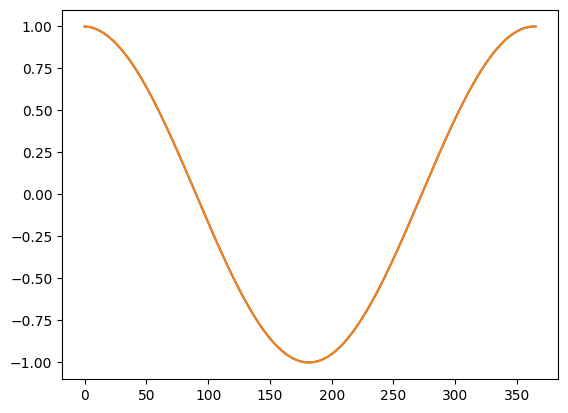

In [464]:
# Criando componente sazonal

sazonalidade = np.cos((2*np.pi)*df['Dia do Ano']/365) # taxa de resíduo queimados por dias
plt.plot(sazonalidade)
df['sazonalidade'] = sazonalidade 
plt.plot(sazonalidade)
df.to_csv(r"I:\airpolution\tabelas\ativ.csv")

#o gráfico mostra o comportamento da sazonalidade conforme valores gerados durante os dias do ano;

In [465]:
#Variablidade das emissões;
import numpy as np

# Gerando variabilidade usando o método Monte Carlo
df['variabilidade'] = np.random.rand(len(df)) * (atvMax - atvMin) + atvMin

# Definindo a produção diária aplicando variabilidade
df['producao_diaria'] =  df['variabilidade'] + df['sazonalidade'] 


print (df)

          Data  Mes  Dia do Ano  atividade  sazonalidade  variabilidade  \
0   2024-01-01    1           1  43.218388      0.999852      39.531054   
1   2024-01-02    1           2  55.128919      0.999407      39.016296   
2   2024-01-03    1           3  40.546286      0.998667      34.351567   
3   2024-01-04    1           4  63.196391      0.997630      44.894268   
4   2024-01-05    1           5  53.597622      0.996298      53.226037   
..         ...  ...         ...        ...           ...            ...   
361 2024-12-27   12         362  53.631697      0.998667      56.507315   
362 2024-12-28   12         363  66.932592      0.999407      62.343230   
363 2024-12-29   12         364  56.703818      0.999852      27.146291   
364 2024-12-30   12         365  38.999826      1.000000      56.690457   
365 2024-12-31   12         366  45.122683      0.999852      23.415163   

     producao_diaria  
0          40.530905  
1          40.015703  
2          35.350234  
3      

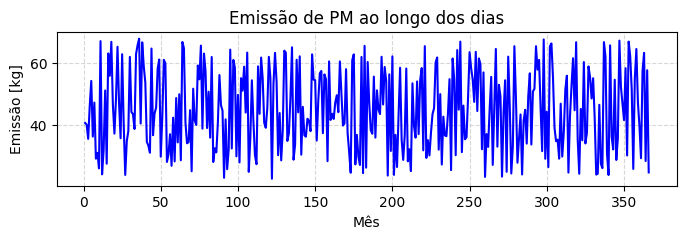

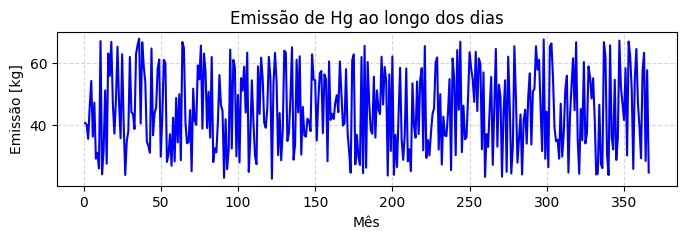

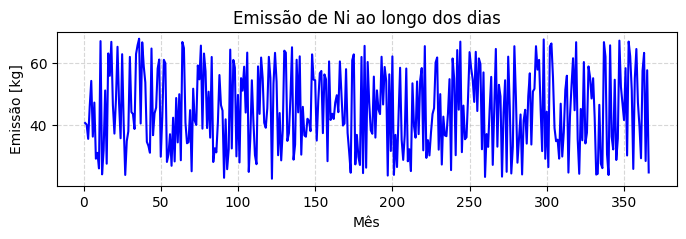

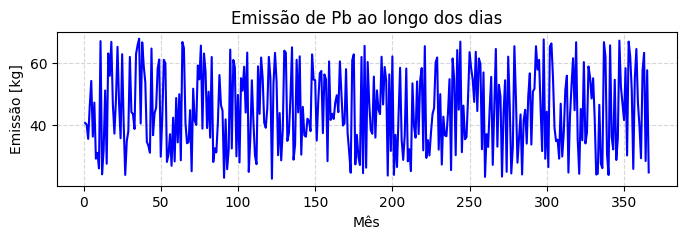

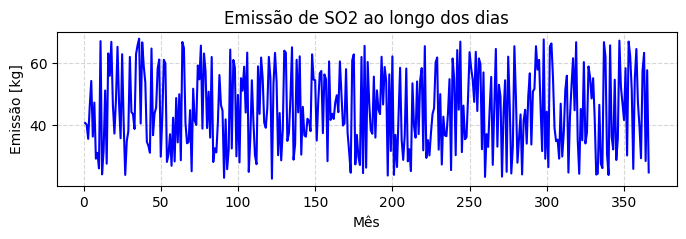

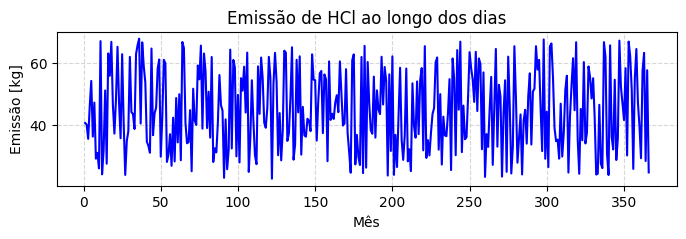

In [466]:
# Gráfico para emissão mensal de cada poluente;
emissoes_dia = {}
for poluente in fe.columns[1:]:
    # Somando as emissões diárias
    emissoes_dia[poluente] = df.groupby('Dia do Ano')['producao_diaria'].sum()

# Gráfios
for poluente, emissao_dia in emissoes_dia.items():
    plt.figure(figsize=(8, 2))
    plt.plot(emissao_dia.index, emissao_dia.values, color='blue')
    plt.title(f'Emissão de {poluente} ao longo dos dias')
    plt.xlabel('Mês')
    plt.ylabel('Emissão [kg]')
    plt.grid(True, linestyle='--', alpha=0.5)  # Adicionando linhas de grade
    plt.show()


46.058538677010965


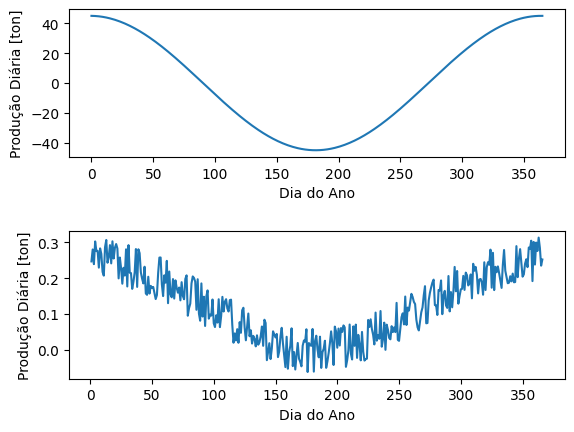

In [467]:
# Valores aleatórios com sazonalidade em base dos mínimos e máximo de atividade 

df['aleatorio'] =  (atvMax - atvMin)*np.random.rand(n) + atvMin

df['aleatorioSazonal'] = (df['atividade'] +  df['sazonalidade']*df['atividade'].mean())*0.0028  #Multiplicado por valor empírico para chegar na média que o empreendimento apresentou para um resultado mais convincente;

fig,ax= plt.subplots(2) #"(2)" significa a quantidade de gráficos
plt.subplots_adjust(hspace=0.5)
ax[1].plot(df['Dia do Ano'], df['aleatorioSazonal'])
ax[1].set_xlabel('Dia do Ano')
ax[1].set_ylabel('Produção Diária [ton]')
ax[0].plot(df['sazonalidade']*df['atividade'].mean())
ax[0].set_xlabel('Dia do Ano')
ax[0].set_ylabel('Produção Diária [ton]')
print(df['aleatorioSazonal'].mean()*365) #Multiplicado pelos dias do ano

# Conforme os gráficos abaixo, vimos o comportamento das concentrações em g/s para cada dia do ano;
# O primeiro gráfico mostra o comportamento linear e o segundo com o ruído de alta e baixa das atividades;

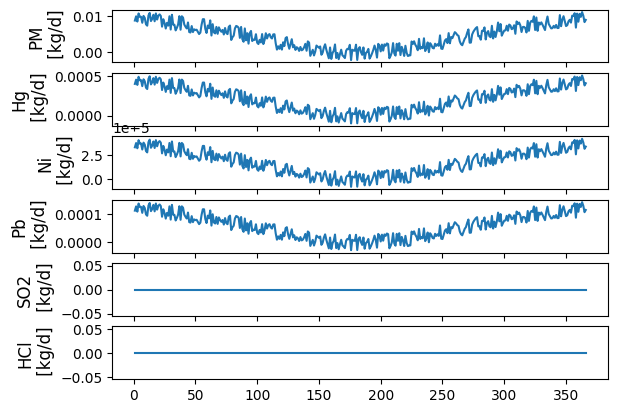

In [468]:
fig,ax= plt.subplots(6)
for ii in range (1,7):
    ax[ii-1].plot(df['Dia do Ano'], df['aleatorioSazonal']*fe.iloc[3,ii])
    ax[ii-1].set_ylabel(fe.columns[ii]+'\n [kg/d]', fontsize = 12)

# Gráfico abaixo está mostrando o comportamento de cada emissão do Gaseificador do empreendimento SALUMA duarante 1 ano.
# Neste gráfico podemos ver que o pico de emissão, se dá no início do ano e no final, sendo os momentos do ano com maior emissão de poluentes.
# Precisamente, no final do ano ocorre uma maior concentração de emissão sendo lançada.

Próximo código fo direcionado para realizar a soma das emissões considerando todos os processos. Mostrando a emissão média, mínima e máxima.

In [469]:
# Calcular as emissões diária para cada poluente
emissoes_dia = {}
for poluente in fe.columns[1:]:
    # Agrupar por mês e somar as emissões diárias
    emissoes_dia[poluente] = df.groupby('Dia do Ano')['producao_diaria'].sum()

# Calcular as emissões totais diarias em g/s para cada poluente
emissoes_totais_g_s = {}
for poluente, emissao_dia in emissoes_dia.items():
    emissoes_totais_g_s[poluente] = emissao_dia * 1000 / (30 * 24 * 3600)  # Convertendo kg para g e dividindo pelo número de segundos em um mês

# Calcular as emissões totais para cada poluente considerando todos os processos
emissoes_totais = {}
for poluente in fe.columns[1:]:
    atv_processo = (atvMax - atvMin) * np.random.rand(len(fe)) + atvMin
    emissoes_totais[poluente] = fe[poluente] * atv_processo

# Calcular a emissão média, mínima e máxima para cada poluente
resultados_emissoes = {}
for poluente, emissao_total in emissoes_totais.items():
    emissao_media = emissao_total.mean()  # Média das emissões totais
    emissao_minima = emissao_total.min()  # Mínima das emissões totais
    emissao_maxima = emissao_total.max()  # Máxima das emissões totais
    resultados_emissoes[poluente] = {
        'Emissão Média (g/s)': emissao_media,
        'Emissão Mínima (g/s)': emissao_minima,
        'Emissão Máxima (g/s)': emissao_maxima
    }

# Exibir os resultados para cada poluente
for poluente, resultados in resultados_emissoes.items():
    print(f"Resultados para o poluente '{poluente}':")
    for chave, valor in resultados.items():
        print(f"{chave}: {valor} ")
    print()  # Adiciona uma linha em branco após cada conjunto de resultados


Resultados para o poluente 'PM':
Emissão Média (g/s): 189.05204685150974 
Emissão Mínima (g/s): 1.3022081578469733 
Emissão Máxima (g/s): 747.3410138032618 

Resultados para o poluente 'Hg':
Emissão Média (g/s): 0.09841349739891955 
Emissão Mínima (g/s): 0.03810766824265344 
Emissão Máxima (g/s): 0.1477504481598439 

Resultados para o poluente 'Ni':
Emissão Média (g/s): 0.07775408052909585 
Emissão Mínima (g/s): 0.0023807198886411484 
Emissão Máxima (g/s): 0.202315344333566 

Resultados para o poluente 'Pb':
Emissão Média (g/s): 1.2086845573918668 
Emissão Mínima (g/s): 0.025017434657429047 
Emissão Máxima (g/s): 4.699139204812507 

Resultados para o poluente 'SO2':
Emissão Média (g/s): 25.905393714026953 
Emissão Mínima (g/s): 0.0 
Emissão Máxima (g/s): 103.62157485610781 

Resultados para o poluente 'HCl':
Emissão Média (g/s): 52.440802476214145 
Emissão Mínima (g/s): 0.0 
Emissão Máxima (g/s): 209.76320990485658 



O Código abaixo foi gerado em função de uma tentativa para gerar um gráfico contemplando a taxa de atividade e a sazonalidade de uma forma geral para facilitar o entendimento.

Traçado ainda uma linha de tendência para achar a variabilidade da taxa de atividade.

c:\Users\Win10\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Win10\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Win10\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['sazonal_order']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
c:\Users\Win10\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parame

Variabilidade da taxa de atividade: 0.15677441713226029


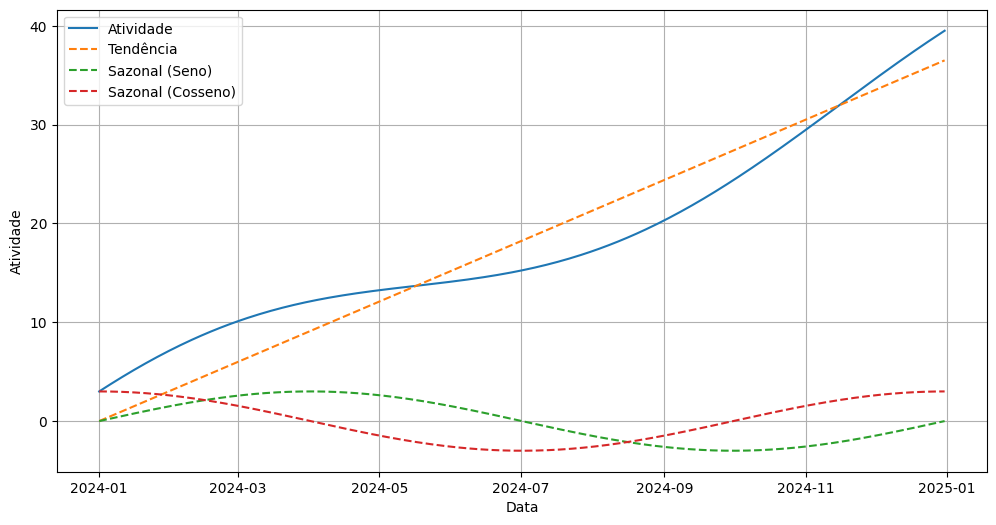

In [470]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Dados
np.random.seed(0)
datas = pd.date_range(start='2024-01-01', end='2024-12-31', freq='D') #Gera um intervalo de datas de 1 de janeiro de 2024 a 31 de dezembro de 2024, com frequência diária.
n = len(datas) #comprimento do intervalo de datas.
trend = 0.1 * np.arange(n)  # tendência linear multiplicando uma sequência numérica pelo valor 0.1.
sazonal_sin = 3 * np.sin(2 * np.pi * np.arange(n) / 365)  # componente sazonal seno / "5" valor para ajustar a amplitude
sazonal_cos = 3 * np.cos(2 * np.pi * np.arange(n) / 365)  # componente sazonal cosseno / "3" valor para ajustar a amplitude
taxa_atividade = trend + sazonal_sin + sazonal_cos #Calcula a taxa de atividade como a soma da tendência, componente sazonal senoidal, componente sazonal cosenoidal e ruído.

# A função seno (np.sin) e cosseno (np.cos) no Python retorna valores entre -1 e 1. 
#Multiplicando esses valores pelo fator 5 (para sazonal_sin) e 3 (para sazonal_cos), estamos amplificando esses valores para que a variação sazonal tenha um impacto maior na taxa de atividade.

# Criar DataFrame
data = pd.DataFrame({'Data': datas, 'Atividade': taxa_atividade}) #Cria um DataFrame com as datas e a taxa de atividade.
data.set_index('Data', inplace=True) 

# Ajustar o modelo SARIMA (Seasonal AutoRegressive Integrated Moving Average)
model = sm.tsa.SARIMAX(data['Atividade'], order=(1, 1, 1), sazonal_order=(1, 1, 1, 12)) # Define um modelo SARIMA (Seasonal AutoRegressive Integrated Moving Average) com uma ordem de diferenciação de 1, ordens ARMA de 1 e uma sazonalidade anual com ordens ARMA de 1
results = model.fit() # Ajusta o modelo aos dados.

# Calcular a variabilidade da taxa de atividade
variability = np.std(results.resid) #Calcula o desvio padrão dos resíduos do modelo ajustado.
print("Variabilidade da taxa de atividade:", variability) 

# Plotar os resultados de dados de taxa de atividade, tendência, componente sazonal senoidal e componente sazonal cosenoidal em um gráfico.
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Atividade'], label='Atividade')
plt.plot(data.index, trend, label='Tendência', linestyle='--')
plt.plot(data.index, sazonal_sin, label='Sazonal (Seno)', linestyle='--')
plt.plot(data.index, sazonal_cos, label='Sazonal (Cosseno)', linestyle='--')
plt.xlabel('Data')
plt.ylabel('Atividade')
plt.legend()
plt.grid(True)
plt.show()

#O objetivo desse código é:
#- Gera uma série temporal de dados de exemplo para a taxa de atividade ao longo de um ano. A série temporal é composta por uma tendência linear, uma componente sazonal senoidal e uma componente sazonal cosenoidal;
#- Um modelo SARIMA é ajustado aos dados de exemplo. O modelo SARIMA é uma extensão do modelo ARIMA (AutoRegressive Integrated Moving Average) que inclui componentes sazonais. 
#Neste caso, o modelo SARIMA tem uma ordem de diferenciação de 1, ordens ARMA de 1 e uma sazonalidade anual com ordens ARMA de 1;
#-A variabilidade da taxa de atividade é calculada como o desvio padrão dos resíduos do modelo ajustado.

Spbre o gráfico: 
- O gráfico nos apresenta um crescimento com tendência a aumentar a cada ano que passa, ou seja, como o crescimento da atividade está aumentando a tendência de poluentes emitidos na atmosfera.